# Programming for Data Science and Artificial Intelligence

## Supervised Learning - Classification - Naive Bayesian - Gaussian

### Readings: 
- [VANDER] Ch5
- [HASTIE] Ch6

In [1]:
Name = "Muhammad Omer Farooq Bhatti"
Id = "st122498"

## Gaussian Naive Classification

In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(y | x)$ (also known as **posteriors**).
Bayes's theorem tells us how to express this in terms of quantities as:

$$
P(y|x) = \frac{P(x|y)P(y)}{P(x)}
$$

The proof is as follows:

- the probabilty of two events x and y happening, $P(x \cap y)$ is the probability of $x$ or $P(x)$, times the probability of $y$ given that $P(x)$ has occured, $P(y \mid x)$

$$ P(x \cap y) = P(x)P(y \mid x)$$

- on the other hand, the probability of $x$ and $y$ is also equal to the probability of $y$ timese the probabilty of $x$ given $y$

$$ P(x \cap y) = P(y)P(x \mid y)$$

- Equating the two yields:

$$ P(x)P(y \mid x) = P(y)P(x \mid y)$$

- Thus

$$ P(y \mid x) = \frac{P(y)P(x \mid y)}{P(x)}$$

-----


Thus, if we know all these three terms on the right, we can find $P(y \mid x)$ (posteriors).  Since if we want to use for classification, we can simply compare the upper term, thus we need to know two terms!  The $P(y)$ (priors) and $P(x \mid y)$ (likelihoods or conditional probability).

$P(y)$ (also known as **priors**) is simply

$$P(y = 1) = \frac{\sum_{i=1}^m 1(y=1)}{m}$$

$$P(y = 0) = \frac{\sum_{i=1}^m 1(y=0)}{m}$$



$P(x \mid y)$ (also known as **likelihoods** or **conditional probability**) is a little bit tricky but if we are willing to make a "naive" assumption, then we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.  Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes.  In this classifier, the assumption is that *data from each label is drawn from a simple Gaussian distribution* as follows:

$$ P(x \mid y=1 ; \mu_1, \sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e ^{-\frac{(x-\mu_1)^{2}}{2\sigma^{2}}}$$
$$ P(x \mid y=0 ; \mu_0, \sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e ^{-\frac{(x-\mu_0)^{2}}{2\sigma^{2}}}$$

where

The mean of feature $j$ when $y=0$ is

$$\mu_{0j} = \frac{\sum_{i=1}^m x_{ij}}{m} $$

This is how the normal distribution looks like

<center><img src="../../figures/normal.png" width=400/></center>



Naive classification assumes all features are independent, thus the total likelihood is just the product:
$$P(x \mid y) = \prod_{i=1}^n P( x_i \mid y )$$

Finally, do $P(y)P(x|y)$

Predict based on which one is bigger.

### Putting everything together

1. Prepare your data
    - $\mathbf{X}$ and $\mathbf{y}$ in the right shape
        - $\mathbf{X}$ -> $(m, n)$
        - $\mathbf{y}$ -> $(m,  )$
        - Note that theta is not needed.  Why?
    - train-test split
    - feature scale
    - clean out any missing data
    - (optional) feature engineering
2. Calculate the mean and std of each feature for each class (from the X_train). 
    $$\mu_{0j} = \frac{\sum_{i=1}^m x_{ij}}{m} $$
   The shape of your mean and std will be $(k, n)$
3. Calculate the **likelihoods** of each sample of each feature (for X_test) using

    $$ P(x \mid y=1 ; \mu_1, \sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e ^{-\frac{(x-\mu_1)^{2}}{2\sigma^{2}}}$$
    $$ P(x \mid y=0 ; \mu_0, \sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e ^{-\frac{(x-\mu_0)^{2}}{2\sigma^{2}}}$$
    
    - The shape of likelihood for class 0 will be $(m, n)$
    - Total likelihood is the product as follows:
    
    $$p(x \mid y) = \prod_{i=1}^n p(x_i \mid y)$$
    
    - The shape of this total likelihood for class 0 will be $(m, )$
    
4. Find **priors** P(y)
$$P(y = 1) = \frac{\Sigma_{i=1}^m 1(y=1)}{m}$$
$$P(y = 0) = \frac{\Sigma_{i=1}^m 1(y=0)}{m}$$

    - The shape of priors for class 0 will be simply a scalar

5. Multiply $P(y)P(x \mid y)$ for each class which will give us $p(y \mid x)$ (**posteriors**)
    
    - For each class, the result of this is simply a multiplication between scalar and $(m, )$ resulting in a shape of $(m, )$, and you will have $k$ of such result.

6. Simply compare $P(y)P(x \mid y)$ for each class, whichever is bigger wins.  Note that we can ignore $P(x)$ since they can be canceled on both sides.

### ===Task===

Load the iris data, and use this Gaussian Naive Classification.  Put them into class and calculate accuracy accordingly.

In [24]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import average_precision_score, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from time import time

In [40]:
class nbGaussian:
    def __init__(self):
        self.X_train = []
        self.y_train = []
        self.mean=[]
        self.std=[]
        self.k=[]
        self.n=[]
        self.priors=[]
        
    def fit(self, xtrain, ytrain, k):
        self.X_train = xtrain
        self.y_train = ytrain
        self.k=k
        self.n=self.X_train.shape[1]
        self.mean = np.zeros((self.k, self.n)) #Shape(k,n) Mean across features n 
        self.std = np.zeros((self.k, self.n))  #Shape(k,n) Standard Deviation across features n
        self.priors = self.calc_priors()       #P(y=k)
        self.calc_mean_std(self.X_train, self.y_train)
        #self.calc_mean_std(self.X_train, self.y_train)
        #print("Mean:")
        #print(self.mean)
        #print("std:")
        #print(self.std)
        #print("Priors:")
        #print(self.priors)
        
        
    def calc_mean_std(self, X_train, y_train): 
        for label in range(0, self.k):
            self.mean[label, :] = X_train[y_train==label].mean(axis=0)
            self.std[label, :]  = X_train[y_train==label].std(axis=0)

        assert self.mean.shape == (self.k, X_train.shape[1])
        assert self.std.shape == (self.k, X_train.shape[1])

    def gaussian_pdf(self, X, mean, std):
        left = 1 / (np.sqrt(2 * np.pi) * std)
        e = (X - mean) ** 2 / (2 * (std ** 2))
        right = np.exp(-e)
        return left*right
    
    def calc_likelihood(self, X_test):
        total_likelihoods = []
        for i in range(0,self.k):
            #Note we are using X_test, since p(x|y) is looking at "new" evidence
            likelihood = self.gaussian_pdf(X_test, self.mean[i, :], self.std[i, :])
            #likelihood = multivariate_normal.pdf(X_test, self.mean[i,:], self.std[i,:])
            total_likelihood = np.prod(likelihood, axis=1)
            total_likelihoods.append(total_likelihood)
            
        assert len(total_likelihoods) == self.k
        #print(f"Shape of likelihoods: {likelihoods[0].shape}\nlikelihoods: {likelihoods[0]}")
        #print(f"Argmax(likelihoods): {[np.argmax(total_likelihood) for total_likelihood in total_likelihoods]}")
        
        return total_likelihoods

    def calc_priors(self):
        num_k=[]
        # probability for k classes
        for i in range(0,self.k):
            m = len(self.X_train[self.y_train==i])
            num_k.append(m)
        assert len(num_k) == self.k
        priors = [num/(sum(num_k)) for num in num_k]
        
        assert sum(priors) == 1, "probability not equal 1"
        return priors
    
    def predict(self,X_test):
        print(f"Running Gaussian Naive Bayes algorithm on the data for classification...")
        posteriors = np.zeros((X_test.shape[0], self.k))  #Shape (m,k)
        total_likelihoods = self.calc_likelihood(X_test)
        #print("P(x|y=0): ", total_likelihoods[0])
        #print("Total likelihood shape for class 0: ", total_likelihoods[0].shape)  #shape is (m, )
        for i in range(0, self.k):
            posteriors[:,i] = self.priors[i] * total_likelihoods[i]  #posteriors as matrix of k columns (m,k)
            
        #print(posteriors[0])
        yhat = [np.argmax(posterior) for posterior in posteriors] #returns index of max value from among k columns (m,)
        return yhat

from (150, 2) we sample (105, 2) for training and (45, 2) for testing.
The no. of classes = 3
Running Gaussian Naive Bayes algorithm on the data for classification...
Time taken: 0.0014946460723876953
[1, 0, 1, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 0, 2, 2, 1, 0, 0]


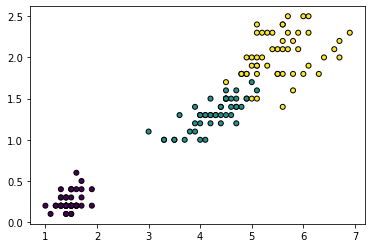

In [50]:
#Prepare data

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the first two features.  #n=2
y = iris.target  #now our y is three classes thus require multinomial   #k=3 
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')


# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

# data split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(f"from {X.shape} we sample {X_train.shape} for training and {X_test.shape} for testing.")
print(f"The no. of classes = {len(set(y))}")

model = nbGaussian()
start = time()
model.fit(X_train, y_train, k = len(set(y)))
yhat=model.predict(X_test)
time_taken = time()-start
print(f"Time taken: {time_taken}")
print(yhat)

In [51]:
print("=========Average precision score=======")
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
yhat_binarized   = label_binarize(yhat, classes=[0, 1, 2])

n_classes = len(set(y_test))

for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:, i])
    print(f"Class {i} score: ", class_score)

=========Average precision score=======
Class 0 score:  1.0
Class 1 score:  0.9391812865497076
Class 2 score:  0.8461538461538461


In [52]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(X_train, y_train)
yhat2 = model2.predict(X_test)
print("=========Average precision score=======")
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
yhat2_binarized   = label_binarize(yhat2, classes=[0, 1, 2])

n_classes = len(set(y_test))

for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat2_binarized[:, i])
    print(f"Class {i} score: ", class_score)

=========Average precision score=======
Class 0 score:  1.0
Class 1 score:  0.9391812865497076
Class 2 score:  0.8461538461538461


from (500, 10) we sample (350, 10) for training and (150, 10) for testing.
The no. of classes = 2
Running Gaussian Naive Bayes algorithm on the data for classification...
Time taken: 0.0024967193603515625
[1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1]


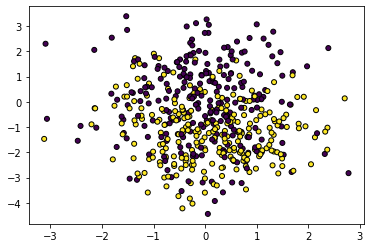

In [53]:
X, y = make_classification(n_samples=500, n_features=10, n_redundant=2, n_informative=4,
                             n_clusters_per_class=2, random_state=14)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

# data split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(f"from {X.shape} we sample {X_train.shape} for training and {X_test.shape} for testing.")
print(f"The no. of classes = {len(set(y))}")

model = nbGaussian()
start = time()
model.fit(X_train, y_train, k = len(set(y)))
yhat=model.predict(X_test)
time_taken = time()-start
print(f"Time taken: {time_taken}")
print(yhat)

In [54]:
from sklearn.metrics import average_precision_score, classification_report
print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Average precision score=======
0.8182840663302091
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.84      0.88      0.86        74
           1       0.88      0.84      0.86        76

    accuracy                           0.86       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.86      0.86      0.86       150



In [55]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(X_train, y_train)
yhat2 = model2.predict(X_test)
print("=========Average precision score=======")
print(average_precision_score(y_test, yhat2))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat2))

=========Average precision score=======
0.8182840663302091
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.84      0.88      0.86        74
           1       0.88      0.84      0.86        76

    accuracy                           0.86       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.86      0.86      0.86       150

